In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [22]:
IMAGE_SIZE = [70, 70]

train_path = 'car_logo/TrainingData'
valid_path = 'car_logo/TestingData'

In [28]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [29]:
for layer in vgg16.layers:
    layer.trainable = False

In [30]:
folders = glob('car_logo/TrainingData/*')
len(folders)

10

In [31]:
#flatten layer
x = Flatten()(vgg16.output)

In [32]:
#Dense layer
prediction = Dense(len(folders), activation='softmax')(x)

In [33]:
# Creating a model
vgg16_model = Model(inputs=vgg16.input, outputs=prediction)

In [34]:
# lets see summary of the model
vgg16_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 70, 70, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 70, 70, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 70, 70, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 35, 35, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 35, 35, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 35, 35, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 17, 17, 128)       0   

In [35]:
# model parameters
vgg16_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [36]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [37]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (70, 70),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [38]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (70, 70),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1500 images belonging to 10 classes.


In [39]:
r = vgg16_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
313/313 [==============================] - 125s 400ms/step - loss: 0.5038 - accuracy: 0.9109 - val_loss: 0.2488 - val_accuracy: 0.9487
Epoch 2/10
313/313 [==============================] - 124s 395ms/step - loss: 0.1042 - accuracy: 0.9918 - val_loss: 0.1593 - val_accuracy: 0.9647
Epoch 3/10
313/313 [==============================] - 124s 396ms/step - loss: 0.0571 - accuracy: 0.9958 - val_loss: 0.1441 - val_accuracy: 0.9627
Epoch 4/10
313/313 [==============================] - 125s 400ms/step - loss: 0.0378 - accuracy: 0.9974 - val_loss: 0.1101 - val_accuracy: 0.9733
Epoch 5/10
313/313 [==============================] - 124s 397ms/step - loss: 0.0271 - accuracy: 0.9980 - val_loss: 0.1092 - val_accuracy: 0.9707
Epoch 6/10
313/313 [==============================] - 123s 394ms/step - loss: 0.0206 - accuracy: 0.9988 - val_loss: 0.1104 - val_accuracy: 0.9680
Epoch 7/10
313/313 [==============================] - 123s 394ms/step - loss: 0.0162 - accuracy: 0.9990 - val_loss: 0.0973 -

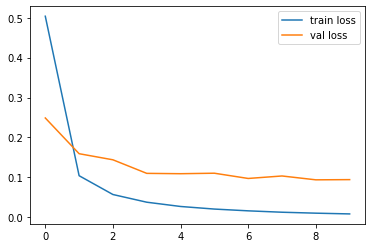

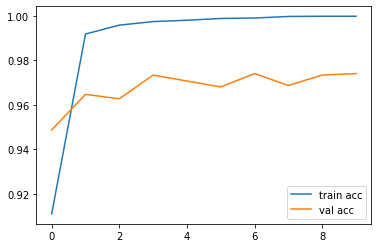

<Figure size 432x288 with 0 Axes>

In [40]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('loss_graph')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('acc_graph')

In [42]:
from tensorflow.keras.models import load_model

vgg16_model.save('vgg16_model.h5')